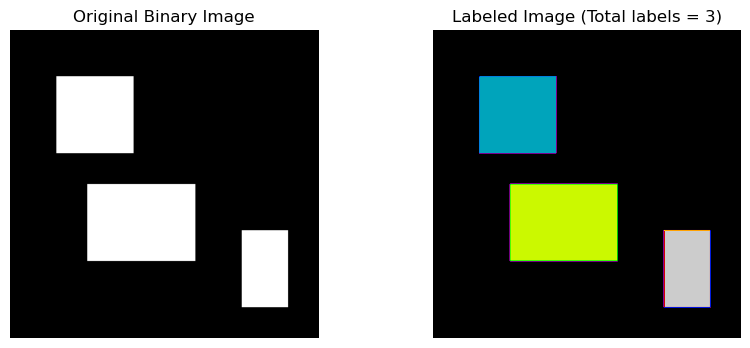

Number of connected components: 3


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 1️⃣ Create a black background
img = np.zeros((200, 300), dtype=np.uint8)

# 2️⃣ Randomly decide how many components to draw (between 2 and 6)
num_objects = random.randint(2, 6)

for i in range(num_objects):
    shape_type = random.choice(["circle", "rectangle", "ellipse"])
    color = 255  # White objects on black background
    
    if shape_type == "circle":
        center = (random.randint(20, 280), random.randint(20, 180))
        radius = random.randint(10, 25)
        cv2.circle(img, center, radius, color, -1)
    
    elif shape_type == "rectangle":
        x1, y1 = random.randint(10, 250), random.randint(10, 150)
        x2, y2 = x1 + random.randint(20, 60), y1 + random.randint(20, 50)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, -1)
    
    else:  # ellipse
        center = (random.randint(40, 260), random.randint(40, 160))
        axes = (random.randint(15, 30), random.randint(10, 25))
        cv2.ellipse(img, center, axes, 0, 0, 360, color, -1)

# 3️⃣ Perform connected component labeling
num_labels, labels = cv2.connectedComponents(img)

print(f"🔹 Number of labels (including background): {num_labels}")
print("🔹 Label matrix:\n", labels)

# 4️⃣ Convert the label image to a color visualization
label_hue = np.uint8(179 * labels / np.max(labels))  # Map labels to hue values
blank_ch = 255 * np.ones_like(label_hue)
colored_img = cv2.merge([label_hue, blank_ch, blank_ch])
colored_img = cv2.cvtColor(colored_img, cv2.COLOR_HSV2BGR)
colored_img[label_hue == 0] = 0  # Set background to black

# 5️⃣ Display original and labeled images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Random Binary Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Labeled Components")
plt.imshow(colored_img)
plt.axis("off")

plt.tight_layout()
plt.show()
